<a href="https://colab.research.google.com/github/joshimohitm9/Feature-Engineering/blob/main/pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import  ColumnTransformer
from sklearn.feature_selection import SelectKBest,chi2

In [2]:
link="https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day29-sklearn-pipelines/train.csv"
df=pd.read_csv(link)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [4]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**without pipeline**


In [7]:
x=df.iloc[:,1:]
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

Text(0.5, 1.0, 'Age Distribution')

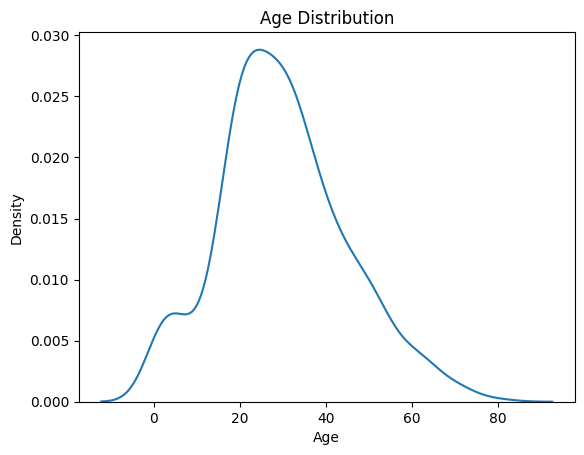

In [8]:
sns.kdeplot(x_train["Age"])
plt.title("Age Distribution")

In [9]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
301,3,male,NaN,2,0,23.2500,Q
309,1,female,30.0,0,0,56.9292,C
516,2,female,34.0,0,0,10.5000,S
120,2,male,21.0,2,0,73.5000,S
570,2,male,62.0,0,0,10.5000,S


In [10]:
si_age=SimpleImputer(strategy="median")
x_train_age=si_age.fit_transform(x_train[["Age"]])
x_test_age=si_age.fit_transform(x_test[["Age"]])


si_embarked=SimpleImputer(strategy="most_frequent")
x_train_embarked=si_embarked.fit_transform(x_train[["Embarked"]])
x_test_embarked=si_embarked.fit_transform(x_test[["Embarked"]])

In [11]:
ohe_sex=OneHotEncoder(sparse=False,handle_unknown="ignore")
x_train_sex=ohe_sex.fit_transform(x_train[["Sex"]])
x_test_sex=ohe_sex.fit_transform(x_test[["Sex"]])

ohe_embarked=OneHotEncoder(sparse=False,handle_unknown="ignore")
x_train_embarked=ohe_embarked.fit_transform(x_train_embarked)
x_test_embarked=ohe_embarked.fit_transform(x_test_embarked)

In [12]:
x_train_rem=x_train.drop(columns=["Sex","Age","Embarked"],axis=1)
x_test_rem=x_test.drop(columns=["Sex","Age","Embarked"],axis=1)

In [13]:
x_test_rem

,Pclass,SibSp,Parch,Fare
862,1,0,0,25.9292
223,3,0,0,7.8958
84,2,0,0,10.5000
680,3,0,0,8.1375
535,2,0,2,26.2500
...,...,...,...,...
796,1,0,0,25.9292
815,1,0,0,0.0000
629,3,0,0,7.7333
421,3,0,0,7.7333


In [14]:
x_train_final=np.concatenate((x_train_rem,x_train_age,x_train_embarked,x_train_sex),axis=1)

In [15]:
x_test_final=np.concatenate((x_test_rem,x_test_age,x_test_embarked,x_test_sex),axis=1)

In [16]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(x_train_final,y_train)

DecisionTreeClassifier()

In [17]:
y_pred=model.predict(x_test_final)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.7653631284916201

In [19]:
metrix=confusion_matrix(y_test,y_pred)

<Axes: >

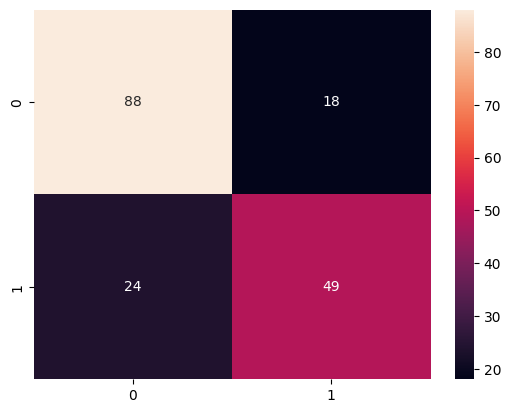

In [20]:
sns.heatmap(metrix,annot=True)

**With Pipeline**

In [21]:
df1=df.copy()

In [22]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [23]:
x_train=df1.drop(df1["Survived"])
y=df1['Survived']
x_traiin,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [23]:
# impute Transformer
trf1=ColumnTransformer([
    ("impute_age",SimpleImputer(strategy="median"),["Age"]),
    ("impute_embarked",SimpleImputer(strategy="most_frequent"),["Embarked"])
],remainder="passthrough")

# One hot encoding
trf2=ColumnTransformer([
    ("ohe_sex_embarked",OneHotEncoder(sparse=False),["Sex","Embarked"])
],remainder="passthrough")

trf3=ColumnTransformer([
    ("scale",MinMaxScaler(),slice(0,10))
],remainder="passthrough")

trf4=DecisionTreeClassifier()


from sklearn.pipeline import Pipeline,make_pipeline

pipe=make_pipeline(trf1,trf2,trf3,trf4)
new_var = pipe.fit(x_train,y_train)